# Investigating TDMB Data set

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

movies = pd.read_csv('../bhavana/tmdb-movies.csv')

In [2]:
#to get information about the data set
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [3]:
#to know number of rows and columns in the dataset
movies.shape

(10866, 21)

# Data Wrangling

1. Remove Duplicates.
<br>
2. Drop unwanted columns that will not contribite to analysis.
<br>
3. Replace NaN or 0 value with mean or median.
<br>
4. Changing data type to appropriate data type.
<br>
5. Adding new columns that are required for better analysis.

In [4]:
# finding total number of duplicates in data set
print(sum(movies.duplicated()))
#Removing duplicates
movies.drop_duplicates(inplace=True)
#Confirming the changes
print(movies.shape)

1
(10865, 21)


In [5]:
#dropping columns 'homepage','imdb_id','tagline','budget','revenue','overview','keywords' since I am not using them in my analysis.
movies.drop(['homepage','imdb_id','tagline','budget','revenue','overview','keywords'],axis=1,inplace=True)
print(movies.shape)

(10865, 14)


In [6]:
#Replace 0 value with median. 
movies['budget_adj'] = movies['budget_adj'].replace(0, movies['budget_adj'].median())
movies['revenue_adj'] = movies['revenue_adj'].replace(0, movies['revenue_adj'].median())
movies['runtime'] = movies['runtime'].replace(0, movies['runtime'].median())

In [7]:
#Changing the data type of the release date into datetime
movies['release_date'] = pd.to_datetime(movies['release_date'])

In [8]:
#inserting profit column that can be calculated by subtracting the budget from the revenue
movies.insert(14, column="profit", value = movies['revenue_adj']-movies['budget_adj'])
print(movies.shape)

(10865, 15)


# Exploring Data

### Correlation between all the variables

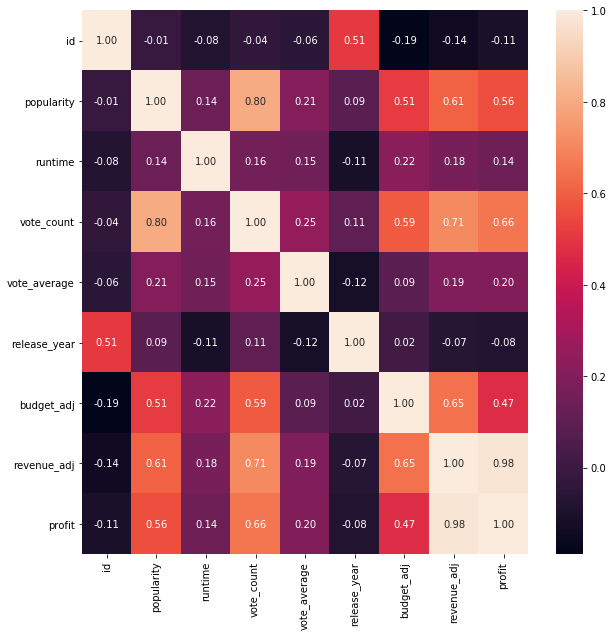

In [9]:
#finding the correlation between all the variables
plt.figure(figsize=(10,10))
sns.heatmap(movies.corr(), annot=True, fmt=".2f")
plt.show()

From above heat map , we have two somewhat strong correlation -
<br>
1. Vote counts and Popularity are positively related - 0.80
<br>
2. Revenue and vote counts are positively related - 0.71
<br>
3. Revenue and popularity are positively related - 0.61
<br>
4. profit and vote counts are positively related - 0.66
<br>
5. profit and popularity are positively related - 0.56

### Sactter Plots

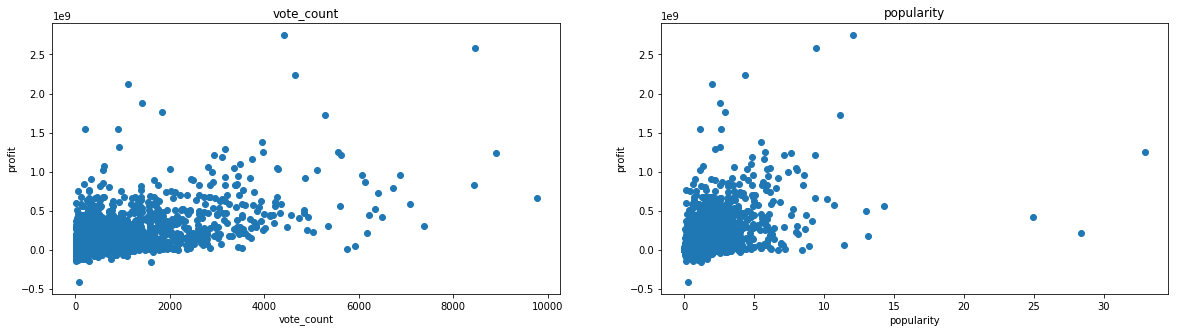

In [10]:
#Scatter plots of provit vs vote_count and profit vs popularity
plt.figure(figsize=(20, 5))
features = ['vote_count','popularity']
target = movies['profit']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = movies[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('profit')

From above plot we can infer that with more vote count and popularity a movie tends to make more profit.

### Profit and Release year
1. Calculating net profit of every year.
<br>
2. Net Profit of every year plot.
<br>
3. Year's with maximum and minimum net profit.
<br>
4. Movies with highest and lowest profit.

In [11]:
#Calculating profit ine each year
net_profit = movies.groupby(['release_year'])['profit'].sum()

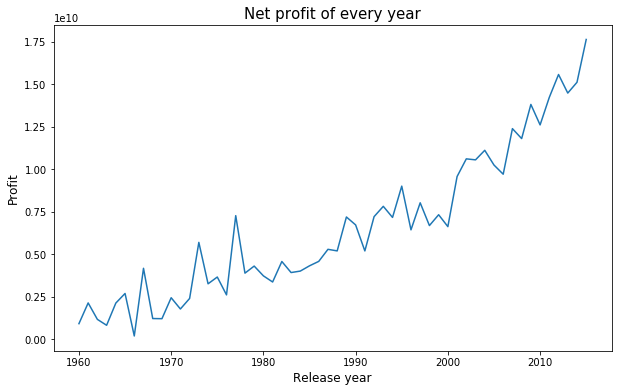

In [12]:
plt.figure(figsize=(10,6))
plt.xlabel('Release year', fontsize = 12) 
plt.ylabel('Profit', fontsize=12)
plt.title('Net profit of every year', fontsize=15)
plt.plot(net_profit)

Net profit is increasing every year with some ups and downs.

In [13]:
#year with maximum and minimum profit
print("Year with maximum profit : "+str(net_profit.idxmax()))
print("Year with minimum profit : "+str(net_profit.idxmin()))

Year with maximum profit : 2015
Year with minimum profit : 1966


In [14]:
#movie with highest profit
movies.loc[movies['profit'].idxmax()]

id                                                                     11
popularity                                                        12.0379
original_title                                                  Star Wars
cast                    Mark Hamill|Harrison Ford|Carrie Fisher|Peter ...
director                                                     George Lucas
runtime                                                               121
genres                                   Adventure|Action|Science Fiction
production_companies     Lucasfilm|Twentieth Century Fox Film Corporation
release_date                                          1977-03-20 00:00:00
vote_count                                                           4428
vote_average                                                          7.9
release_year                                                         1977
budget_adj                                                    3.95756e+07
revenue_adj                           

In [15]:
#movie with lowest profit
movies.loc[movies['profit'].idxmin()]

id                                                                  46528
popularity                                                        0.25054
original_title                                          The Warrior's Way
cast                    Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...
director                                                       Sngmoo Lee
runtime                                                               100
genres                          Adventure|Fantasy|Action|Western|Thriller
production_companies                             Boram Entertainment Inc.
release_date                                          2010-12-02 00:00:00
vote_count                                                             74
vote_average                                                          6.4
release_year                                                         2010
budget_adj                                                       4.25e+08
revenue_adj                           

### Run time, vote count and profit
1. Histogram of run time of all movies.
<br>
2. Box pot of run time of all the movies.
<br>
3. Average, Median, Minimum and Maximum Runtimes.
<br>
4. Movie run time and vote count
<br>
5. Movie run time and profit.

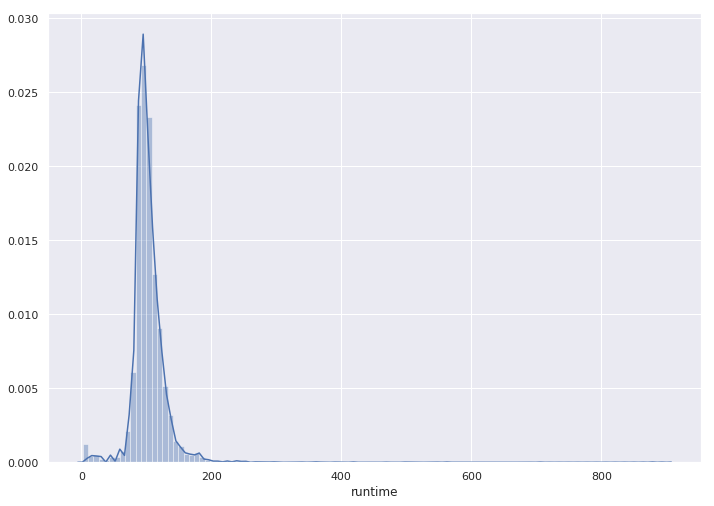

In [16]:
#distribution plot of runtimes
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(movies['runtime'],norm_hist = True, bins=110)
plt.show()

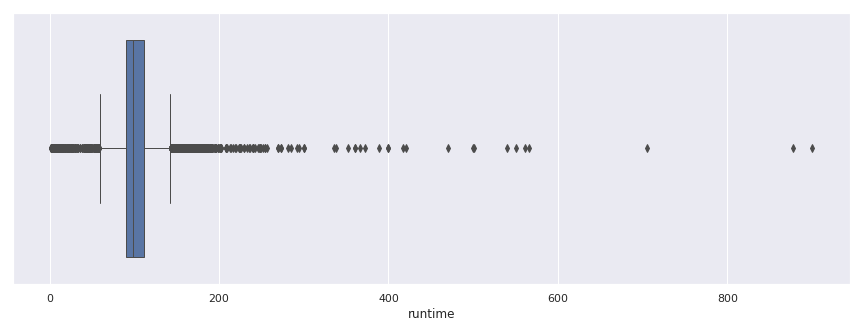

In [17]:
#Box plpts of runtimes
plt.figure(figsize=(15,5))
sns.boxplot(movies['runtime'], linewidth = 1)
plt.show()

In [18]:
movies['runtime'].describe()

count    10865.000000
mean       102.354257
std         30.904560
min          2.000000
25%         90.000000
50%         99.000000
75%        111.000000
max        900.000000
Name: runtime, dtype: float64

From the above graphs and values we can say that the the run times are __Right skewed__.

In [19]:
#run time and vote count
runtime_votecount = movies.groupby(['runtime'])['vote_count'].sum()
rt_maxvc = runtime_votecount.idxmax()
rt_minvc = runtime_votecount.idxmin()
print("movies with "+str(rt_maxvc)+" run time has more vote count of "+str(runtime_votecount[rt_maxvc]))
print("movies with "+str(rt_minvc)+" run time has less vote count of "+str(runtime_votecount[rt_minvc]))

movies with 100 run time has more vote count of 62033
movies with 224 run time has less vote count of 10


In [20]:
#run time and profit
runtime_profit = movies.groupby(['runtime'])['profit'].sum()
rt_maxp = runtime_profit.idxmax()
rt_minp = runtime_profit.idxmin()
print("movies with "+str(rt_maxp)+" run time has maximum profit of "+str(runtime_profit[rt_maxp]))
print("movies with "+str(rt_minp)+" run time has minimum profit of "+str(runtime_profit[rt_minp]))

movies with 115 run time has maximum profit of 10677936788.0
movies with 173 run time has minimum profit of -123278015.09


### Number of movies released per month

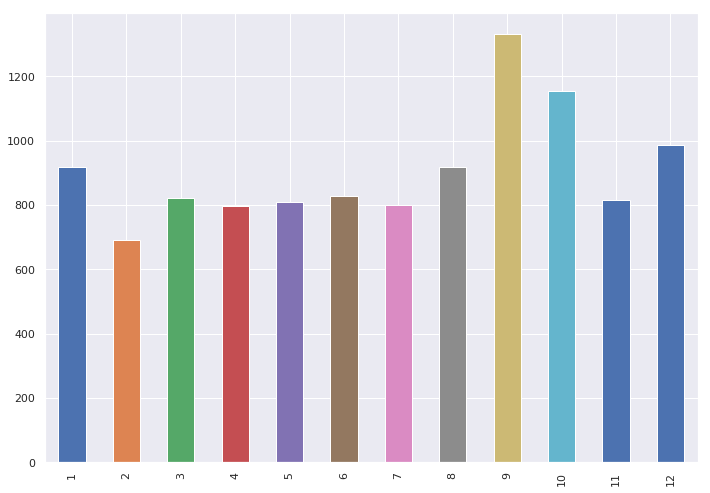

In [21]:
month_release = movies['release_date'].dt.month
#count the movies in each month using value_counts().
number_of_release = month_release.value_counts().sort_index()
#print(number_of_release)
number_of_release.plot(kind='bar')

More number of movies are released in the month __September__

### Director
1. Top 5 Directors with more number of movies.
<br>
2. Inserting director_01 column.
<br>
3. Top 5 Directors with highest profit.
<br>
4. Top 5 Directors with highest popularity.
<br>
5. Dropping director_01 column and  remving duplicates.

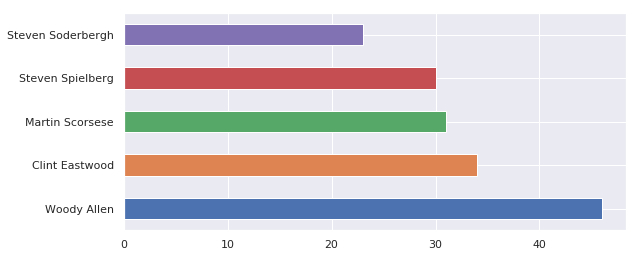

In [22]:
#Genres with more movies
genres = movies["director"].str.cat(sep="|").split("|")
table=pd.Series(genres).value_counts()[:5]
table.plot.barh(figsize=(9,4))

In [23]:
#Inserting director_01 column
print(movies.shape)
g = movies['director'].str.split('|').apply(pd.Series, 1).stack()
g.index = g.index.droplevel(-1)
g.name = 'director_01'
movies = movies.join(g)
movies.shape

(10865, 15)


(11935, 16)

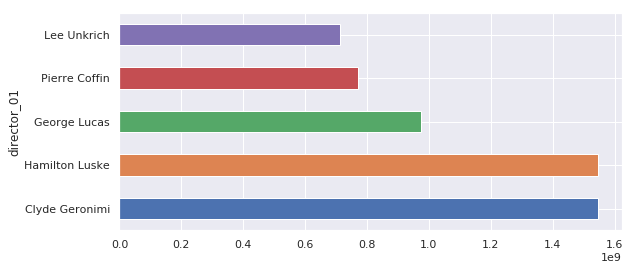

In [24]:
#Top 5 director's with highest profit
z = movies.groupby('director_01').mean().profit
z1 = z.sort_values(ascending=[False])
#print(z.idxmax())
table=z1[:5]
table.plot.barh(figsize=(9,4))

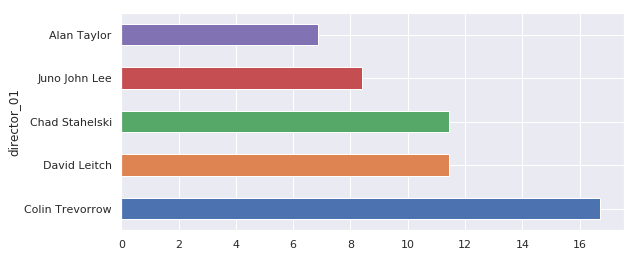

In [25]:
#Top 5 most popular Directors
z2 = movies.groupby('director_01').mean().popularity
z3 = z2.sort_values(ascending=[False])
#print(z3.idxmax())
table=z3[:5]
table.plot.barh(figsize=(9,4))

In [26]:
#deleting director_01 column and removing the duplicates
del movies['director_01']
print(movies.shape)
print(sum(movies.duplicated()))
#Removing duplicates
movies.drop_duplicates(inplace=True)
#Confirming the changes
print(movies.shape)

(11935, 15)
1070
(10865, 15)


### Genres
1. Top 5 Genres with more number of movies
<br>
2. Inserting Genre_01 column.
<br>
3. List of all Genres.
<br>
4. Top 5 Genre  with highest profit.
<br>
5. Top 5 Genre with highest vote average. 
<br>
6. Top 5 most popular Genres.
<br>
7. Dropping Geres_01 column and removing duplicates.

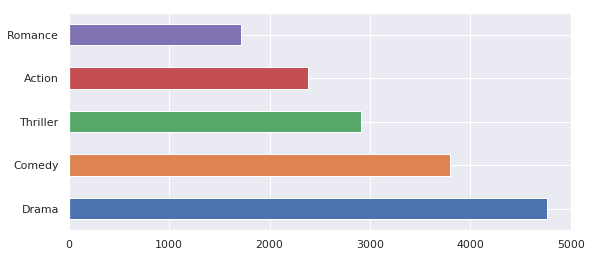

In [27]:
#Genres with more movies
genres = movies["genres"].str.cat(sep="|").split("|")
table=pd.Series(genres).value_counts()[:5]
table.plot.barh(figsize=(9,4))

In [28]:
#Inserting genres_01 column
g = movies['genres'].str.split('|').apply(pd.Series, 1).stack()
g.index = g.index.droplevel(-1)
g.name = 'genres_01'
movies = movies.join(g)

In [29]:
#List of all the available genres
movies['genres_01'].unique()

array(['Action', 'Adventure', 'Science Fiction', 'Thriller', 'Fantasy',
       'Crime', 'Western', 'Drama', 'Family', 'Animation', 'Comedy',
       'Mystery', 'Romance', 'War', 'History', 'Music', 'Horror',
       'Documentary', 'TV Movie', nan, 'Foreign'], dtype=object)

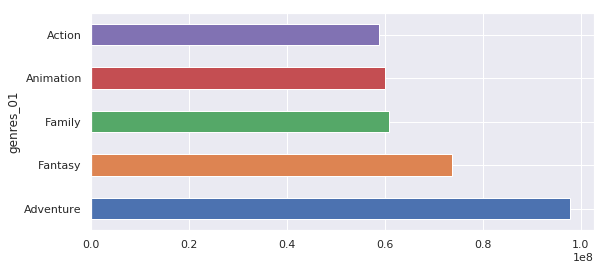

In [30]:
#Top 5 Genre with highest profit
z = movies.groupby('genres_01').mean().profit
z1 = z.sort_values(ascending=[False])
#print(z.idxmax())
table=z1[:5]
table.plot.barh(figsize=(9,4))

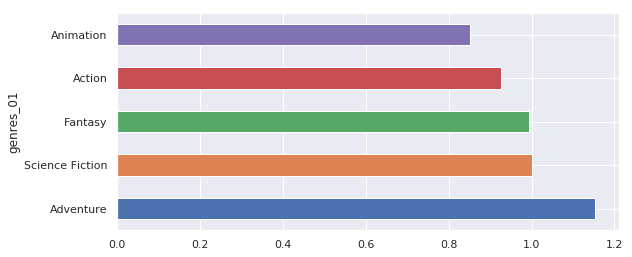

In [31]:
#Top 5 most popular Genres
z2 = movies.groupby('genres_01').mean().popularity
z3 = z2.sort_values(ascending=[False])
#print(z3.idxmax())
table=z3[:5]
table.plot.barh(figsize=(9,4))

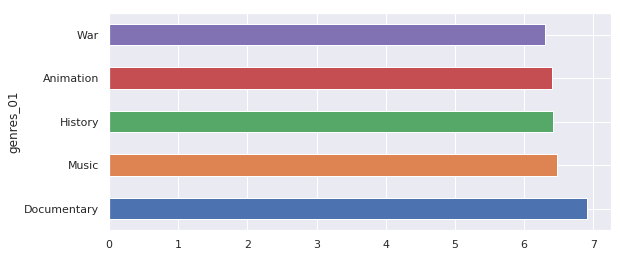

In [32]:
#Top 5 Genere with highest number of vote_average
z2 = movies.groupby('genres_01').mean().vote_average
z3 = z2.sort_values(ascending=[False])
#print(z3.idxmax())
table=z3[:5]
table.plot.barh(figsize=(9,4))

In [33]:
#deleting genres_01 column and removing the duplicates
del movies['genres_01']
print(movies.shape)
print(sum(movies.duplicated()))
#Removing duplicates
movies.drop_duplicates(inplace=True)
#Confirming the changes
print(movies.shape)

(26978, 15)
16113
(10865, 15)


### Cast
1. Top 5 People casted in more number of movies.
<br>
2. Inserting Cast_01 column.
<br>
3. Top 5 cast  with highest profit.
<br>
4. Top 5 cast with highest popularity.
<br>
5. Dropping Cast_01 column and  remving duplicates.

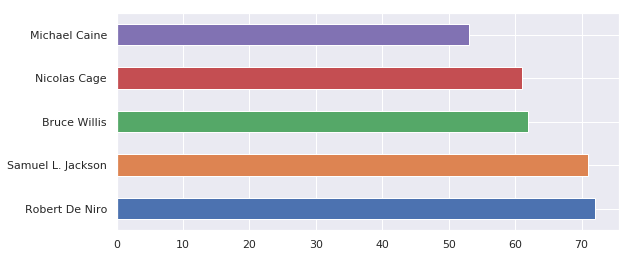

In [34]:
#People casted in more number of movies
cast = movies["cast"].str.cat(sep="|").split("|")
table=pd.Series(cast).value_counts()[:5]
table.plot.barh(figsize=(9,4))

In [35]:
#Inserting cast_01 column
g = movies['cast'].str.split('|').apply(pd.Series, 1).stack()
g.index = g.index.droplevel(-1)
g.name = 'cast_01'
movies = movies.join(g)

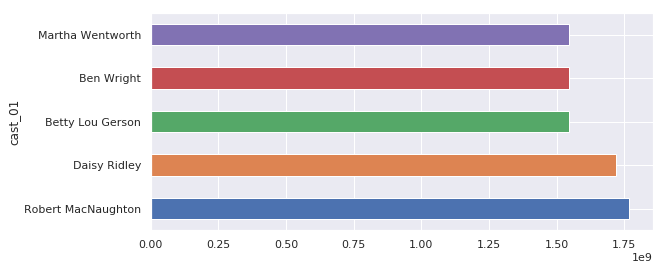

In [36]:
#Top 5 people with highest profit
z = movies.groupby('cast_01').mean().profit
z1 = z.sort_values(ascending=[False])
#print(z.idxmax())
table=z1[:5]
table.plot.barh(figsize=(9,4))

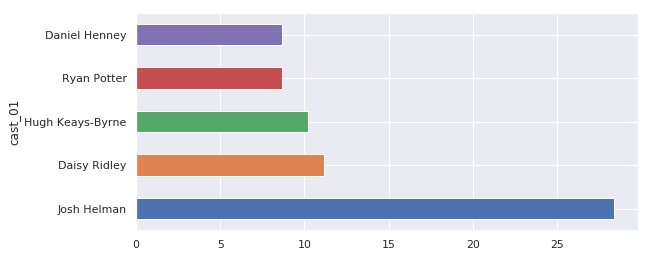

In [37]:
#Top 5 most popular Cast
z2 = movies.groupby('cast_01').mean().popularity
z3 = z2.sort_values(ascending=[False])
#print(z3.idxmax())
table=z3[:5]
table.plot.barh(figsize=(9,4))

In [38]:
#deleting Cast_01 column and removing the duplicates
del movies['cast_01']
print(movies.shape)
print(sum(movies.duplicated()))
#Removing duplicates
movies.drop_duplicates(inplace=True)
#Confirming the changes
print(movies.shape)

(52644, 15)
41779
(10865, 15)


### Production Companies
1. Top 5 Production companies that produced number of movies.
<br>
2. Inserting production_01 column.
<br>
3. Top 5 production_companies with highest profit.
<br>
4. Top 5 popular production companies.
<br>
4. Dropping Cast_01 column and  remving duplicates.

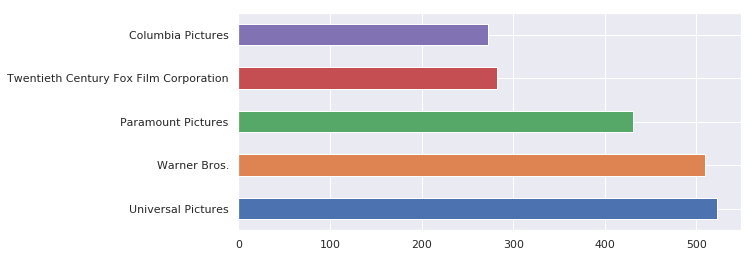

In [39]:
#People casted in more number of movies
pc = movies["production_companies"].str.cat(sep="|").split("|")
table=pd.Series(pc).value_counts()[:5]
table.plot.barh(figsize=(9,4))

In [40]:
#Inserting production_companies_01 column
g = movies['production_companies'].str.split('|').apply(pd.Series, 1).stack()
g.index = g.index.droplevel(-1)
g.name = 'production_companies_01'
movies = movies.join(g)

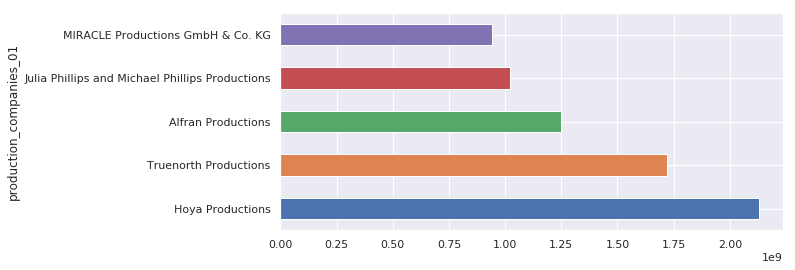

In [41]:
#Top 5 production_companies with highest profit
z = movies.groupby('production_companies_01').mean().profit
z1 = z.sort_values(ascending=[False])
#print(z.idxmax())
table=z1[:5]
table.plot.barh(figsize=(9,4))

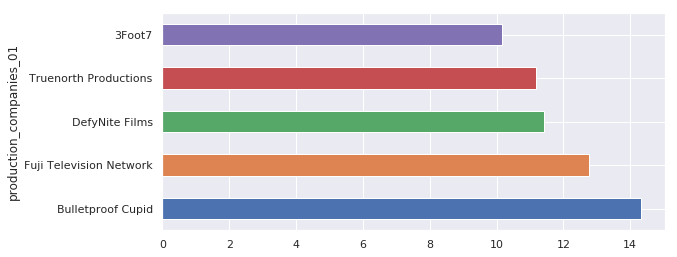

In [42]:
#Top 5 most popular production companies
z2 = movies.groupby('production_companies_01').mean().popularity
z3 = z2.sort_values(ascending=[False])
#print(z3.idxmax())
table=z3[:5]
table.plot.barh(figsize=(9,4))

In [43]:
#deleting Cast_01 column and removing the duplicates
del movies['production_companies_01']
print(movies.shape)
print(sum(movies.duplicated()))
#Removing duplicates
movies.drop_duplicates(inplace=True)
#Confirming the changes
print(movies.shape)

(24255, 15)
13390
(10865, 15)


# Conclusions

### Correlations -
1. Vote counts and Popularity are positively related - 0.80
<br>
2. Revenue and vote counts are positively related - 0.71
<br>
3. Revenue and popularity are positively related - 0.61
<br>
4. profit and vote counts are positively related - 0.66
<br>
5. profit and popularity are positively related - 0.56

### Profit -
Net profit is increasing every year with some ups and downs.
<br>
Year with maximum profit : 2015
<br>
Year with minimum profit : 1966
<br>
Star war's is movie with the hightest profit.
<br>
The Warrior's Way is the movie with the highest profit.

### Runtime -
Run times plot is a Right skewed plot.
<br>
Movies with 100 run time has more vote count of 62033.
<br>
Movies with 224 run time has less vote count of 10.
<br>
movies with 115 run time has maximum profit of 10677936788.0
<br>
movies with 173 run time has minimum profit of -123278015.09


<br>
More number of movies are released in the month __September__.

### Directors -
1. Top 5 Directors with more number of movies - 
<br>
Woody Allen, Client Eastwood, Martin Scorsese, Steven spielberg, Steven Soderbergh.
<br>
2. Top 5 Directors with highest profit -
<br>
Clyde Geronimi, Hamilton Luske, George Lucas, Pierre Coffin, Lee Unkrinch.
<br>
3. Top 5 Directors with highest popularity -
Colin Trevorrow, David Leitch, Chad Stahelski, Juno John Lee, Alan Taylor.

### Genres -
1. Top 5 Genres with more number of movies - 
<br>
Romance, Action, Thriller, Comedy, Drama.
<br>
2. Top 5 Genre with highest profit -
<br>
Action, Animation, Family, Fantasy, Adventutre.
<br>
3. Top 5 Genre with highest vote average -
<br>
Animation, Action, Fantasy, Sciene Fiction, Adventure.
<br>
4. Top 5 most popular Genres - 
<br>
War, Animation, History, Music, Documentary.
<br>


### Cast - 
1. Top 5 People casted in more number of movies -
<br>
Robert De Niro, SamuelL.Jackson, Bruce Willis, Nicolas Cage, Michael Caine.
<br>
2. Top 5 cast with highest profit. -
<br>
Robert Mac Naughton, Daisy Ridley, Betty Lou Gerson, Ben Wright, Martha Wentworth.
3. Top 5 cast with highest popularity -
<br>
Jsoh Helman, Daisy Ridley, Hugh Keays Byrne, Ryan Potter, Daniel Henney.
<br>

### Production Companies -
1. Top 5 Production companies that produced number of movies -
<br>
Universal pictures, Warner Bros, Paramount Pictures,Twentieth Century Fox film Corporation, Columbia Pictures.
<br>
2. Top 5 production_companies with highest profit -
<br>
Hoya Productions, truenorth Productions, Altran Productions, Julia Phillips and Michael Phllips Production, MIRACLE Productions  GmbH & Co.KG.
<br>
3. Top 5 popular production companies - 
<br>
Bulletproof Cupid, Fuji Telivision Network, DefyNite Films, Truenorth Productions, 3Foot7.


For a movie to be more successful , these conditions can apply -
<br>
1. It should have either of the top 5 actors 
<br>
2. It should be produced from either of the top 5 production company.
<br>
3. It should be of either of the top 5 genres that we derived from the database.
<br>
4. And/or it should be of the top 5 directors
<br>

__Note__ : There is no direct relation between profit and popular actor,genres, directors or production company.
Although we got name of the actors,directors,production companies contributed most in film industry,that belong most popular and most profitable movies

### Limitations 

Some values are missing in the data set which affects the data description values like mean ,meadian etc.